# Load packages

In [1]:
from scipy.io.idl import readsav
import midi
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Load MinXSS Data

In [64]:
data = readsav('/Users/jmason86/Dropbox/minxss_dropbox/data/fm1/level1/minxss1_l1_mission_length.sav')
minxsslevel1 = data.minxsslevel1_x123.copy()

# Isolate a single flare in MinXSS data

In [65]:
flareData = minxsslevel1#[1000:2000] # TODO: Find the indices for an actual flare

In [303]:
# Store needed variables
energy = flareData[0]['energy']
irradiance = flareData['irradiance']
timeJd = []
timeHuman = []
for timeIndex in range(len(irradiance)):
    timeJd.append(flareData[timeIndex]['time']['jd'][0])
    timeHuman.append(flareData[timeIndex]['time']['human'][0])

# Convert MinXSS data to MIDI

In [236]:
# Custom rebinning of energy
energy5NoteBins = np.linspace(0, 4, num=40)
energy7NoteBins = np.linspace(0, 4, num=57)

## Irradiance to velocity

In [299]:
# Irradiance scaling
irradiance = np.vstack(irradiance)
irradianceScaled = np.log(irradiance)
irradianceScaled = np.clip(irradianceScaled, 0, 100.0)
#irradianceScaled = np.power(irradiance, 0.02)
irradianceScaledMax = np.nanmax(max(irradianceScaled, key=tuple))
velocity = irradianceScaled * (100.0 / irradianceScaledMax)

# Bin into 7 note key
velocity7NoteBins = np.empty((len(velocity), len(energy7NoteBins)))
for timeIndex in range(len(timeJd)):
     velocity7NoteBins[timeIndex, :] = np.interp(energy7NoteBins, energy, velocity[timeIndex])

# Apply ceiling to velocity and convert to integer array
velocity7NoteBins = np.ceil(velocity7NoteBins)
velocity7NoteBins = velocity7NoteBins.astype(int)

# Bin into 5 note key
#energy5NoteBins = energy[::26]
velocity5NoteBins = np.empty((len(velocity), len(energy5NoteBins)))
for timeIndex in range(len(timeJd)):
    velocity5NoteBins[timeIndex, :] = np.interp(energy5NoteBins, energy, velocity[timeIndex])

# Convert NAN to 0 and apply ceiling to velocity and convert to integer array
#velocity5NoteBins = np.clip(velocity5NoteBins, 0, 100)
velocity5NoteBins = np.nan_to_num(velocity5NoteBins)
velocity5NoteBins = np.ceil(velocity5NoteBins)
velocity5NoteBins = velocity5NoteBins.astype(int)

/Users/jmason86/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


## Energy to pitch

In [209]:
# Allow for 8 octaves
# 7 note key (e.g., major or minor)
# 8 * 7 = 56 total allowed notes
# 1024 bins / 56 notes = 18 bins / note
        
notesDMajor = [midi.D_0, midi.E_0, midi.Fs_0, midi.G_0, midi.A_0, midi.B_0, midi.Cs_0, \
               midi.D_1, midi.E_1, midi.Fs_1, midi.G_1, midi.A_1, midi.B_1, midi.Cs_1, \
               midi.D_2, midi.E_2, midi.Fs_2, midi.G_2, midi.A_2, midi.B_2, midi.Cs_2, \
               midi.D_3, midi.E_3, midi.Fs_3, midi.G_3, midi.A_3, midi.B_3, midi.Cs_3, \
               midi.D_4, midi.E_4, midi.Fs_4, midi.G_4, midi.A_4, midi.B_4, midi.Cs_4, \
               midi.D_5, midi.E_5, midi.Fs_5, midi.G_5, midi.A_5, midi.B_5, midi.Cs_5, \
               midi.D_6, midi.E_6, midi.Fs_6, midi.G_6, midi.A_6, midi.B_6, midi.Cs_6, \
               midi.D_7, midi.E_7, midi.Fs_7, midi.G_7, midi.A_7, midi.B_7, midi.Cs_7, midi.D_8]

notesFMinor = [midi.F_0, midi.G_0, midi.Ab_0, midi.Bb_0, midi.C_0, midi.Db_0, midi.Eb_0, \
               midi.F_1, midi.G_1, midi.Ab_1, midi.Bb_1, midi.C_1, midi.Db_1, midi.Eb_1, \
               midi.F_2, midi.G_2, midi.Ab_2, midi.Bb_2, midi.C_2, midi.Db_2, midi.Eb_2, \
               midi.F_3, midi.G_3, midi.Ab_3, midi.Bb_3, midi.C_3, midi.Db_3, midi.Eb_3, \
               midi.F_4, midi.G_4, midi.Ab_4, midi.Bb_4, midi.C_4, midi.Db_4, midi.Eb_4, \
               midi.F_5, midi.G_5, midi.Ab_5, midi.Bb_5, midi.C_5, midi.Db_5, midi.Eb_5, \
               midi.F_6, midi.G_6, midi.Ab_6, midi.Bb_6, midi.C_6, midi.Db_6, midi.Eb_6, \
               midi.F_7, midi.G_7, midi.Ab_7, midi.Bb_7, midi.C_7, midi.Db_7, midi.Eb_7, midi.F_8]

# 5 note key (pentatonic)
# 8 * 5 = 40 total allowed notes
# 1024 bins / 40 notes = 26 bins / note

notesCMinorPentatonic = [midi.C_0, midi.Eb_0, midi.F_0, midi.G_0, midi.Bb_0, \
                         midi.C_1, midi.Eb_1, midi.F_1, midi.G_1, midi.Bb_1, \
                         midi.C_2, midi.Eb_2, midi.F_2, midi.G_2, midi.Bb_2, \
                         midi.C_3, midi.Eb_3, midi.F_3, midi.G_3, midi.Bb_3, \
                         midi.C_4, midi.Eb_4, midi.F_4, midi.G_4, midi.Bb_4, \
                         midi.C_5, midi.Eb_5, midi.F_5, midi.G_5, midi.Bb_5, \
                         midi.C_6, midi.Eb_6, midi.F_6, midi.G_6, midi.Bb_6, \
                         midi.C_7, midi.Eb_7, midi.F_7, midi.G_7, midi.Bb_7, midi.C_8]

## Longitude to duration

In [318]:
# Get good variety of note durations
scaledLongitude = (minxsslevel1.longitude + 180) / 360. * 100.
noteDuration = (scaledLongitude * 1) + 50 # [ticks] 0.0005 seconds per tick at 120 bpm

# Apply ceiling to velocity and convert to integer array
noteDuration = np.ceil(noteDuration)
noteDuration = noteDuration.astype(int)

## Loop through energies to add tracks and time to add notes

In [319]:
# Instantiate a MIDI Pattern (contains a list of tracks)
pattern = midi.Pattern()
for energyIndex in range(len(energy5NoteBins)):
    # Instantiate a MIDI Track (contains a list of MIDI events)
    track = midi.Track()
    # Append the track to the pattern
    pattern.append(track)
    
    for timeIndex in range(len(timeJd)):
        # Instantiate a MIDI note on event, append it to the track
        note = notesCMinorPentatonic[energyIndex]
        velocity = velocity5NoteBins[timeIndex, energyIndex]
        on = midi.NoteOnEvent(tick=0, \
                              velocity = velocity, \
                              pitch = note)
        track.append(on)
        
        # Instantiate a MIDI note off event, append it to the track
        off = midi.NoteOffEvent(tick=noteDuration[timeIndex], pitch=midi.G_3)
        track.append(off)
    
    # Add the end of track event, append it to the track
    eot = midi.EndOfTrackEvent(tick=1)
    track.append(eot)

In [322]:
# Save the pattern to disk
midi.write_midifile("minxss_music.mid", pattern)

# Make some plots to sanity check the scaling and such

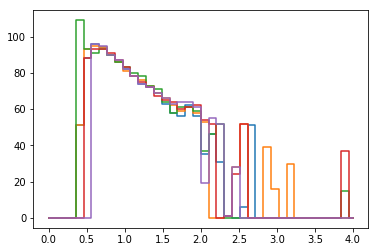

In [244]:
for i in range(5):
    plt.plot(energy5NoteBins, velocity5NoteBins[100+i, :], drawstyle = 'steps-mid')

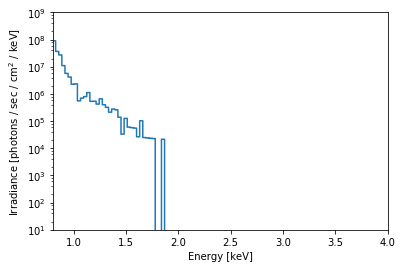

In [249]:
plt.plot(minxsslevel1[1000]['energy'], minxsslevel1[1000]['irradiance'], drawstyle = 'steps-mid')
plt.xlim([0.8, 4.0])
plt.xlabel('Energy [keV]')
plt.ylim([1e1, 1e9])
plt.yscale('log')
plt.ylabel('Irradiance [photons / sec / cm$^2$ / keV]')

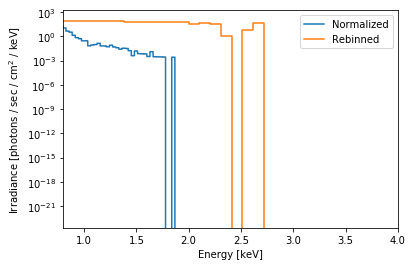

In [288]:
normalized = minxsslevel1[1000]['irradiance'] / np.nanmax(minxsslevel1[1000]['irradiance']) * 100.0
plt.plot(minxsslevel1[1000]['energy'], normalized, drawstyle = 'steps-mid', label='Normalized')
plt.xlim([0.8, 4.0])
plt.xlabel('Energy [keV]')
plt.yscale('log')
plt.ylabel('Irradiance [photons / sec / cm$^2$ / keV]')
plt.plot(energy5NoteBins, velocity5NoteBins[100, :], drawstyle = 'steps-mid', label='Rebinned')
plt.legend(loc='best')